In [37]:
# Import dependencies
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress
import hvplot.pandas
import warnings
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
from api_keys import geoapify_key

warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'api_keys'

In [3]:
# The path to your CSV files
file_paths = ["resources/2015.csv", "resources/2016.csv", "resources/2017.csv", "resources/2018.csv", "resources/2019.csv"]

# Loop through the file paths for 2015-2020 and process each file separately
for file_path in file_paths:
    year = os.path.splitext(os.path.basename(file_path))[0]  # Extract the year from the file name
    df = pd.read_csv(file_path, thousands=',', decimal='.')

    # Determine the column name for the "Country" column
    country_column = None
    if 'Country' in df.columns:
        country_column = 'Country'
    elif 'Country or region' in df.columns:
        country_column = 'Country or region'

    if country_column:
        # Define a dictionary to map column names to the desired names
        df.rename(columns={
            "Country or region": "Country",
            "Country name": "Country",
            "Happiness.Score": "Happiness Score",
            "Ladder score": "Happiness Score",
            "Score": "Happiness Score",
            "Economy..GDP.per.Capita.": "GDP per Capita",
            "Economy (GDP per Capita)": "GDP per Capita",
            "Logged GDP per capita": "GDP per Capita",
            "GDP per capita": "GDP per Capita",
            "Family": "Social Support",
            "Social support": "Social Support",
            "Explained by: GDP per capita": "GDP per Capita",
            "Health..Life.Expectancy.": "Life Expectancy/Health",
            "Health (Life Expectancy)": "Life Expectancy/Health",
            "Healthy life expectancy": "Life Expectancy/Health",
            "Freedom to make life choices": "Freedom",
            "Trust..Government.Corruption.": "Trust (government corruption)",
            "Trust (Government Corruption)": "Trust (government corruption)",
            "Perceptions of corruption": "Trust (government corruption)",
            "Explained by: Generosity": "Generosity"
        }, inplace=True)

        # Select the desired columns in the specified order
        desired_columns = ["Country", "Happiness Score", "GDP per Capita", 
                           "Social Support", "Life Expectancy/Health", "Freedom", "Trust (government corruption)", 
                           "Generosity"]

        df = df[desired_columns]

        # Save the processed DataFrame to a separate CSV file for the current year
        output_file = f"resources/data_{year}_.csv"
        df.to_csv(output_file, index=False)
    

In [19]:
# 2020 needs columns dropped to rename and merge correctly
# Define the file path to CSV file
file_path = "2020.csv"

# Extract the year from the file name
year = os.path.splitext(os.path.basename(file_path))[0]

# Read CSV file
df = pd.read_csv(file_path, thousands=',', decimal='.')

# Drop unwanted columns
columns_to_drop = [
    "Standard error of ladder score",
    "upperwhisker",
    "lowerwhisker",
    "Logged GDP per capita",
    "Social support",
    "Healthy life expectancy",
    "Freedom to make life choices",
    "Generosity",
    "Perceptions of corruption",
    "Ladder score in Dystopia",
    "Dystopia + residual",
    "Regional indicator"
]

df.drop(columns=columns_to_drop, inplace=True)

# Rename the remaining columns
df.rename(columns={
    "Country name": "Country",
    "Ladder score": "Happiness Score",
    "Explained by: Log GDP per capita": "GDP per Capita",
    "Explained by: Social support": "Social Support",
    "Explained by: Healthy life expectancy": "Life Expectancy/Health",
    "Explained by: Freedom to make life choices": "Freedom",
    "Explained by: Perceptions of corruption": "Trust (government corruption)",
    "Explained by: Generosity": "Generosity"
}, inplace=True)

# Select the desired columns in the specified order
desired_columns = ["Country", "Happiness Score", "GDP per Capita", 
                           "Social Support", "Life Expectancy/Health", "Freedom", "Trust (government corruption)", 
                           "Generosity"]

df = df[desired_columns]

# Save the processed DataFrame to a separate CSV file for the current year
output_file = f"resources/{year}_data.csv"
df.to_csv(output_file, index=False)

# Create a df for 2020
data2020 = pd.DataFrame(df)
data2020

Country  Happiness Score  GDP per Capita  \
0                     Finland           7.8087        1.285190   
1                     Denmark           7.6456        1.326949   
2                 Switzerland           7.5599        1.390774   
3                     Iceland           7.5045        1.326502   
4                      Norway           7.4880        1.424207   
..                        ...              ...             ...   
148  Central African Republic           3.4759        0.041072   
149                    Rwanda           3.3123        0.343243   
150                  Zimbabwe           3.2992        0.425564   
151               South Sudan           2.8166        0.289083   
152               Afghanistan           2.5669        0.300706   

     Social Support  Life Expectancy/Health   Freedom  \
0          1.499526                0.961271  0.662317   
1          1.503449                0.979333  0.665040   
2          1.472403                1.040533  0.628954   
3          1.547567                1.000843  0.661981   
4          1.495173                1.008072  0.670201   
..              ...                     ...       ...   
148        0.000000                0.000000  0.292814   
149        0.522876                0.572383  0.604088   
150        1.047835                0.375038  0.377405   
151        0.553279                0.208809  0.065609   
152        0.356434                0.266052  0.000000   

     Trust (government corruption)  Generosity  
0                         0.477857    0.159670  
1                         0.495260    0.242793  
2                         0.407946    0.269056  
3                         0.144541    0.362330  
4                         0.434101    0.287985  
..                             ...         ...  
148                       0.028265    0.253513  
149                       0.485542    0.235705  
150                       0.080929    0.151349  
151                       0.111157    0.209935  
152                       0.001226    0.135235  

[153 rows x 8 columns]

In [9]:
#Read our datas from csv files
data2015 = pd.read_csv('resources/data_2015_.csv') 
data2016 = pd.read_csv('resources/data_2016_.csv') 
data2017 = pd.read_csv('resources/data_2017_.csv') 
data2018 = pd.read_csv('resources/data_2018_.csv') 
data2019 = pd.read_csv('resources/data_2016_.csv') 

Country  Happiness Score  GDP per Capita  Social Support  \
0  Switzerland            7.587         1.39651         1.34951   
1      Iceland            7.561         1.30232         1.40223   
2      Denmark            7.527         1.32548         1.36058   
3       Norway            7.522         1.45900         1.33095   
4       Canada            7.427         1.32629         1.32261   
5      Finland            7.406         1.29025         1.31826   
6  Netherlands            7.378         1.32944         1.28017   
7       Sweden            7.364         1.33171         1.28907   
8  New Zealand            7.286         1.25018         1.31967   
9    Australia            7.284         1.33358         1.30923   

   Life Expectancy/Health  Freedom  Trust (government corruption)  Generosity  
0                 0.94143  0.66557                        0.41978     0.29678  
1                 0.94784  0.62877                        0.14145     0.43630  
2                 0.87464  0.64938                        0.48357     0.34139  
3                 0.88521  0.66973                        0.36503     0.34699  
4                 0.90563  0.63297                        0.32957     0.45811  
5                 0.88911  0.64169                        0.41372     0.23351  
6                 0.89284  0.61576                        0.31814     0.47610  
7                 0.91087  0.65980                        0.43844     0.36262  
8                 0.90837  0.63938                        0.42922     0.47501  
9                 0.93156  0.65124                        0.35637     0.43562

# Top 10 and bottom 10 countries for Happiness Score

In [ ]:
# Get the top 10 of the given year
data2015.head(10)

In [10]:
# Get the bottom 10 of the given year
data2015.tail(10)

Country  Happiness Score  GDP per Capita  Social Support  \
148          Chad            3.667         0.34193         0.76062   
149        Guinea            3.656         0.17417         0.46475   
150   Ivory Coast            3.655         0.46534         0.77115   
151  Burkina Faso            3.587         0.25812         0.85188   
152   Afghanistan            3.575         0.31982         0.30285   
153        Rwanda            3.465         0.22208         0.77370   
154         Benin            3.340         0.28665         0.35386   
155         Syria            3.006         0.66320         0.47489   
156       Burundi            2.905         0.01530         0.41587   
157          Togo            2.839         0.20868         0.13995   

     Life Expectancy/Health  Freedom  Trust (government corruption)  \
148                 0.15010  0.23501                        0.05269   
149                 0.24009  0.37725                        0.12139   
150                 0.15185  0.46866                        0.17922   
151                 0.27125  0.39493                        0.12832   
152                 0.30335  0.23414                        0.09719   
153                 0.42864  0.59201                        0.55191   
154                 0.31910  0.48450                        0.08010   
155                 0.72193  0.15684                        0.18906   
156                 0.22396  0.11850                        0.10062   
157                 0.28443  0.36453                        0.10731   

     Generosity  
148     0.18386  
149     0.28657  
150     0.20165  
151     0.21747  
152     0.36510  
153     0.22628  
154     0.18260  
155     0.47179  
156     0.19727  
157     0.16681

# Summary statistics

In [11]:
data2015.describe()

Happiness Score  GDP per Capita  Social Support  \
count       158.000000      158.000000      158.000000   
mean          5.375734        0.846137        0.991046   
std           1.145010        0.403121        0.272369   
min           2.839000        0.000000        0.000000   
25%           4.526000        0.545808        0.856823   
50%           5.232500        0.910245        1.029510   
75%           6.243750        1.158448        1.214405   
max           7.587000        1.690420        1.402230   

       Life Expectancy/Health     Freedom  Trust (government corruption)  \
count              158.000000  158.000000                     158.000000   
mean                 0.630259    0.428615                       0.143422   
std                  0.247078    0.150693                       0.120034   
min                  0.000000    0.000000                       0.000000   
25%                  0.439185    0.328330                       0.061675   
50%                  0.696705    0.435515                       0.107220   
75%                  0.811013    0.549092                       0.180255   
max                  1.025250    0.669730                       0.551910   

       Generosity  
count  158.000000  
mean     0.237296  
std      0.126685  
min      0.000000  
25%      0.150553  
50%      0.216130  
75%      0.309883  
max      0.795880

In [13]:
data2016.describe()

Happiness Score  GDP per Capita  Social Support  \
count       157.000000      157.000000      157.000000   
mean          5.382185        0.953880        0.793621   
std           1.141674        0.412595        0.266706   
min           2.905000        0.000000        0.000000   
25%           4.404000        0.670240        0.641840   
50%           5.314000        1.027800        0.841420   
75%           6.269000        1.279640        1.021520   
max           7.526000        1.824270        1.183260   

       Life Expectancy/Health     Freedom  Trust (government corruption)  \
count              157.000000  157.000000                     157.000000   
mean                 0.557619    0.370994                       0.137624   
std                  0.229349    0.145507                       0.111038   
min                  0.000000    0.000000                       0.000000   
25%                  0.382910    0.257480                       0.061260   
50%                  0.596590    0.397470                       0.105470   
75%                  0.729930    0.484530                       0.175540   
max                  0.952770    0.608480                       0.505210   

       Generosity  
count  157.000000  
mean     0.242635  
std      0.133756  
min      0.000000  
25%      0.154570  
50%      0.222450  
75%      0.311850  
max      0.819710

In [14]:
data2017.describe()

Happiness Score  GDP per Capita  Social Support  \
count       155.000000      155.000000      155.000000   
mean          5.354019        0.984718        1.188898   
std           1.131230        0.420793        0.287263   
min           2.693000        0.000000        0.000000   
25%           4.505500        0.663371        1.042635   
50%           5.279000        1.064578        1.253918   
75%           6.101500        1.318027        1.414316   
max           7.537000        1.870766        1.610574   

       Life Expectancy/Health     Freedom  Trust (government corruption)  \
count              155.000000  155.000000                     155.000000   
mean                 0.551341    0.408786                       0.123120   
std                  0.237073    0.149997                       0.101661   
min                  0.000000    0.000000                       0.000000   
25%                  0.369866    0.303677                       0.057271   
50%                  0.606042    0.437454                       0.089848   
75%                  0.723008    0.516561                       0.153296   
max                  0.949492    0.658249                       0.464308   

       Generosity  
count  155.000000  
mean     0.246883  
std      0.134780  
min      0.000000  
25%      0.154106  
50%      0.231538  
75%      0.323762  
max      0.838075

In [15]:
data2018.describe()

Happiness Score  GDP per Capita  Social Support  \
count       156.000000      156.000000      156.000000   
mean          5.375917        0.891449        1.213237   
std           1.119506        0.391921        0.302372   
min           2.905000        0.000000        0.000000   
25%           4.453750        0.616250        1.066750   
50%           5.378000        0.949500        1.255000   
75%           6.168500        1.197750        1.463000   
max           7.632000        2.096000        1.644000   

       Life Expectancy/Health     Freedom  Trust (government corruption)  \
count              156.000000  156.000000                     155.000000   
mean                 0.597346    0.454506                       0.112000   
std                  0.247579    0.162424                       0.096492   
min                  0.000000    0.000000                       0.000000   
25%                  0.422250    0.356000                       0.051000   
50%                  0.644000    0.487000                       0.082000   
75%                  0.777250    0.578500                       0.137000   
max                  1.030000    0.724000                       0.457000   

       Generosity  
count  156.000000  
mean     0.181006  
std      0.098471  
min      0.000000  
25%      0.109500  
50%      0.174000  
75%      0.239000  
max      0.598000

In [16]:
data2019.describe()

Happiness Score  GDP per Capita  Social Support  \
count       157.000000      157.000000      157.000000   
mean          5.382185        0.953880        0.793621   
std           1.141674        0.412595        0.266706   
min           2.905000        0.000000        0.000000   
25%           4.404000        0.670240        0.641840   
50%           5.314000        1.027800        0.841420   
75%           6.269000        1.279640        1.021520   
max           7.526000        1.824270        1.183260   

       Life Expectancy/Health     Freedom  Trust (government corruption)  \
count              157.000000  157.000000                     157.000000   
mean                 0.557619    0.370994                       0.137624   
std                  0.229349    0.145507                       0.111038   
min                  0.000000    0.000000                       0.000000   
25%                  0.382910    0.257480                       0.061260   
50%                  0.596590    0.397470                       0.105470   
75%                  0.729930    0.484530                       0.175540   
max                  0.952770    0.608480                       0.505210   

       Generosity  
count  157.000000  
mean     0.242635  
std      0.133756  
min      0.000000  
25%      0.154570  
50%      0.222450  
75%      0.311850  
max      0.819710

In [20]:
data2020.describe()

Happiness Score  GDP per Capita  Social Support  \
count        153.00000      153.000000      153.000000   
mean           5.47324        0.868771        1.155607   
std            1.11227        0.372416        0.286866   
min            2.56690        0.000000        0.000000   
25%            4.72410        0.575862        0.986718   
50%            5.51500        0.918549        1.203987   
75%            6.22850        1.169229        1.387139   
max            7.80870        1.536676        1.547567   

       Life Expectancy/Health     Freedom  Trust (government corruption)  \
count              153.000000  153.000000                     153.000000   
mean                 0.692869    0.463583                       0.130718   
std                  0.254094    0.141172                       0.113097   
min                  0.000000    0.000000                       0.000000   
25%                  0.495443    0.381457                       0.055805   
50%                  0.759818    0.483293                       0.098435   
75%                  0.867249    0.576665                       0.163064   
max                  1.137814    0.693270                       0.533162   

       Generosity  
count  153.000000  
mean     0.189375  
std      0.100401  
min      0.000000  
25%      0.115006  
50%      0.176745  
75%      0.255510  
max      0.569814

# Correlation Coefficient

In [31]:
# Get the correlation map
data2015.corr()

Happiness Score  GDP per Capita  \
Happiness Score                       1.000000        0.780966   
GDP per Capita                        0.780966        1.000000   
Social Support                        0.740605        0.645299   
Life Expectancy/Health                0.724200        0.816478   
Freedom                               0.568211        0.370300   
Trust (government corruption)         0.395199        0.307885   
Generosity                            0.180319       -0.010465   

                               Social Support  Life Expectancy/Health  \
Happiness Score                      0.740605                0.724200   
GDP per Capita                       0.645299                0.816478   
Social Support                       1.000000                0.531104   
Life Expectancy/Health               0.531104                1.000000   
Freedom                              0.441518                0.360477   
Trust (government corruption)        0.205605                0.248335   
Generosity                           0.087513                0.108335   

                                Freedom  Trust (government corruption)  \
Happiness Score                0.568211                       0.395199   
GDP per Capita                 0.370300                       0.307885   
Social Support                 0.441518                       0.205605   
Life Expectancy/Health         0.360477                       0.248335   
Freedom                        1.000000                       0.493524   
Trust (government corruption)  0.493524                       1.000000   
Generosity                     0.373916                       0.276123   

                               Generosity  
Happiness Score                  0.180319  
GDP per Capita                  -0.010465  
Social Support                   0.087513  
Life Expectancy/Health           0.108335  
Freedom                          0.373916  
Trust (government corruption)    0.276123  
Generosity                       1.000000

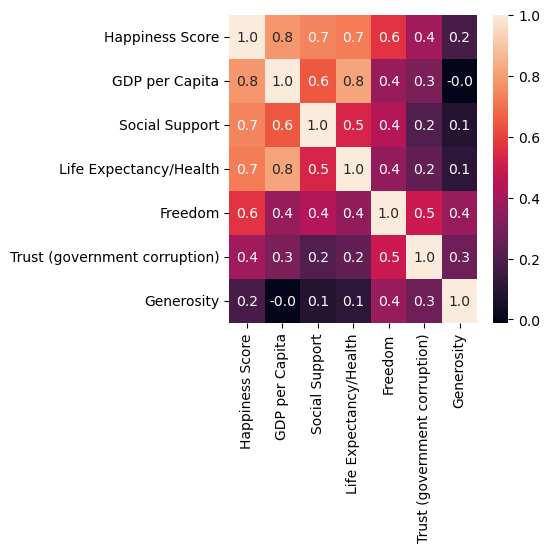

In [32]:
# Plot a correlation map
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(data2015.corr(), annot=True,fmt='.1f',ax=ax) 

# Dismiss an information column
plt.show() 

In [24]:
data2016.corr()

Happiness Score  GDP per Capita  \
Happiness Score                       1.000000        0.790322   
GDP per Capita                        0.790322        1.000000   
Social Support                        0.739252        0.669540   
Life Expectancy/Health                0.765384        0.837067   
Freedom                               0.566827        0.362283   
Trust (government corruption)         0.402032        0.294185   
Generosity                            0.156848       -0.025531   

                               Social Support  Life Expectancy/Health  \
Happiness Score                      0.739252                0.765384   
GDP per Capita                       0.669540                0.837067   
Social Support                       1.000000                0.588377   
Life Expectancy/Health               0.588377                1.000000   
Freedom                              0.450208                0.341199   
Trust (government corruption)        0.213561                0.249583   
Generosity                           0.089629                0.075987   

                                Freedom  Trust (government corruption)  \
Happiness Score                0.566827                       0.402032   
GDP per Capita                 0.362283                       0.294185   
Social Support                 0.450208                       0.213561   
Life Expectancy/Health         0.341199                       0.249583   
Freedom                        1.000000                       0.502054   
Trust (government corruption)  0.502054                       1.000000   
Generosity                     0.361751                       0.305930   

                               Generosity  
Happiness Score                  0.156848  
GDP per Capita                  -0.025531  
Social Support                   0.089629  
Life Expectancy/Health           0.075987  
Freedom                          0.361751  
Trust (government corruption)    0.305930  
Generosity                       1.000000

In [25]:
data2017.corr()

Happiness Score  GDP per Capita  \
Happiness Score                       1.000000        0.812469   
GDP per Capita                        0.812469        1.000000   
Social Support                        0.752737        0.688296   
Life Expectancy/Health                0.781951        0.843077   
Freedom                               0.570137        0.369873   
Trust (government corruption)         0.429080        0.350944   
Generosity                            0.155256       -0.019011   

                               Social Support  Life Expectancy/Health  \
Happiness Score                      0.752737                0.781951   
GDP per Capita                       0.688296                0.843077   
Social Support                       1.000000                0.612080   
Life Expectancy/Health               0.612080                1.000000   
Freedom                              0.424966                0.349827   
Trust (government corruption)        0.231841                0.279752   
Generosity                           0.051693                0.063191   

                                Freedom  Trust (government corruption)  \
Happiness Score                0.570137                       0.429080   
GDP per Capita                 0.369873                       0.350944   
Social Support                 0.424966                       0.231841   
Life Expectancy/Health         0.349827                       0.279752   
Freedom                        1.000000                       0.499183   
Trust (government corruption)  0.499183                       1.000000   
Generosity                     0.316083                       0.294159   

                               Generosity  
Happiness Score                  0.155256  
GDP per Capita                  -0.019011  
Social Support                   0.051693  
Life Expectancy/Health           0.063191  
Freedom                          0.316083  
Trust (government corruption)    0.294159  
Generosity                       1.000000

In [26]:
data2018.corr()

Happiness Score  GDP per Capita  \
Happiness Score                       1.000000        0.802124   
GDP per Capita                        0.802124        1.000000   
Social Support                        0.745760        0.672080   
Life Expectancy/Health                0.775814        0.844273   
Freedom                               0.544280        0.332275   
Trust (government corruption)         0.405292        0.319582   
Generosity                            0.135825       -0.011241   

                               Social Support  Life Expectancy/Health  \
Happiness Score                      0.745760                0.775814   
GDP per Capita                       0.672080                0.844273   
Social Support                       1.000000                0.667288   
Life Expectancy/Health               0.667288                1.000000   
Freedom                              0.411087                0.355475   
Trust (government corruption)        0.218364                0.315569   
Generosity                           0.018226                0.020751   

                                Freedom  Trust (government corruption)  \
Happiness Score                0.544280                       0.405292   
GDP per Capita                 0.332275                       0.319582   
Social Support                 0.411087                       0.218364   
Life Expectancy/Health         0.355475                       0.315569   
Freedom                        1.000000                       0.462446   
Trust (government corruption)  0.462446                       1.000000   
Generosity                     0.297988                       0.362249   

                               Generosity  
Happiness Score                  0.135825  
GDP per Capita                  -0.011241  
Social Support                   0.018226  
Life Expectancy/Health           0.020751  
Freedom                          0.297988  
Trust (government corruption)    0.362249  
Generosity                       1.000000

In [27]:
data2019.corr()

Happiness Score  GDP per Capita  \
Happiness Score                       1.000000        0.790322   
GDP per Capita                        0.790322        1.000000   
Social Support                        0.739252        0.669540   
Life Expectancy/Health                0.765384        0.837067   
Freedom                               0.566827        0.362283   
Trust (government corruption)         0.402032        0.294185   
Generosity                            0.156848       -0.025531   

                               Social Support  Life Expectancy/Health  \
Happiness Score                      0.739252                0.765384   
GDP per Capita                       0.669540                0.837067   
Social Support                       1.000000                0.588377   
Life Expectancy/Health               0.588377                1.000000   
Freedom                              0.450208                0.341199   
Trust (government corruption)        0.213561                0.249583   
Generosity                           0.089629                0.075987   

                                Freedom  Trust (government corruption)  \
Happiness Score                0.566827                       0.402032   
GDP per Capita                 0.362283                       0.294185   
Social Support                 0.450208                       0.213561   
Life Expectancy/Health         0.341199                       0.249583   
Freedom                        1.000000                       0.502054   
Trust (government corruption)  0.502054                       1.000000   
Generosity                     0.361751                       0.305930   

                               Generosity  
Happiness Score                  0.156848  
GDP per Capita                  -0.025531  
Social Support                   0.089629  
Life Expectancy/Health           0.075987  
Freedom                          0.361751  
Trust (government corruption)    0.305930  
Generosity                       1.000000

In [28]:
data2020.corr()

Happiness Score  GDP per Capita  \
Happiness Score                       1.000000        0.775374   
GDP per Capita                        0.775374        1.000000   
Social Support                        0.765001        0.781814   
Life Expectancy/Health                0.770316        0.848469   
Freedom                               0.590597        0.419019   
Trust (government corruption)         0.418305        0.334729   
Generosity                            0.069043       -0.118399   

                               Social Support  Life Expectancy/Health  \
Happiness Score                      0.765001                0.770316   
GDP per Capita                       0.781814                0.848469   
Social Support                       1.000000                0.742744   
Life Expectancy/Health               0.742744                1.000000   
Freedom                              0.478863                0.448846   
Trust (government corruption)        0.210530                0.353841   
Generosity                          -0.056780               -0.071852   

                                Freedom  Trust (government corruption)  \
Happiness Score                0.590597                       0.418305   
GDP per Capita                 0.419019                       0.334729   
Social Support                 0.478863                       0.210530   
Life Expectancy/Health         0.448846                       0.353841   
Freedom                        1.000000                       0.420145   
Trust (government corruption)  0.420145                       1.000000   
Generosity                     0.253721                       0.278480   

                               Generosity  
Happiness Score                  0.069043  
GDP per Capita                  -0.118399  
Social Support                  -0.056780  
Life Expectancy/Health          -0.071852  
Freedom                          0.253721  
Trust (government corruption)    0.278480  
Generosity                       1.000000

# Visualisations of summary statistics

In [33]:
# Create DataFrames for each year
dataframes = {
    '2015': data2015,
    '2016': data2016,
    '2017': data2017,
    '2018': data2018,
    '2019': data2019,
    '2020': data2020
}

# Concatenate DataFrames into a single DataFrame and add the 'Year' column
df = pd.concat([df.assign(Year=year) for year, df in dataframes.items()], ignore_index=True)

# Calculate the mean values for each variable over the years
mean_data = df.groupby(['Year']).mean()

# Reset the index for plotting
mean_data = mean_data.reset_index()

# Melt the DataFrame for easier plotting
mean_data_melted = pd.melt(mean_data, id_vars=['Year'], var_name='Variable', value_name='Mean Value')

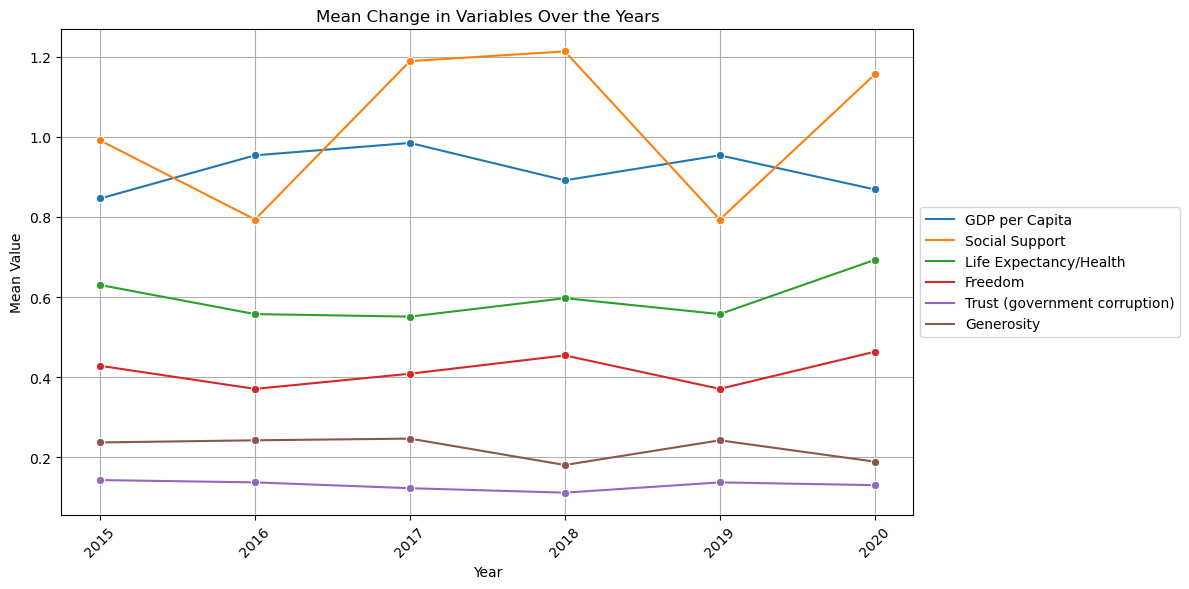

In [34]:
# Create a combined line plot for the other variables with labels
plt.figure(figsize=(12, 6))
other_variable_data = mean_data_melted[mean_data_melted['Variable'] != 'Happiness Score']
sns.lineplot(data=other_variable_data, x='Year', y='Mean Value', hue='Variable', marker='o')
plt.title('Mean Change in Happiness Score Over the Years')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.title('Mean Change in Variables Over the Years')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

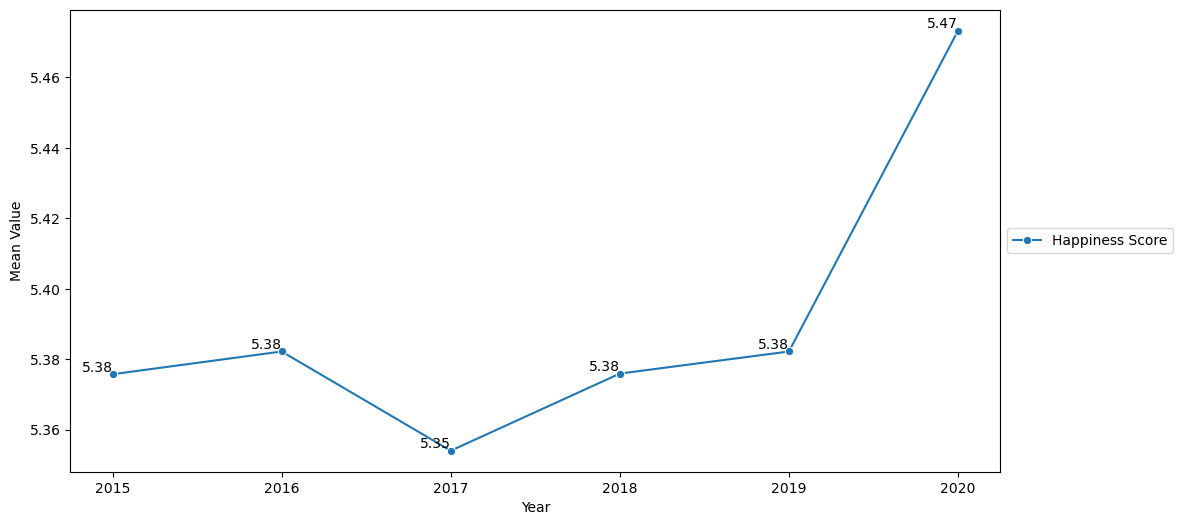

In [35]:
# Create a line plot for Happiness Score with labels
plt.figure(figsize=(12, 6))
happiness_score_data = mean_data_melted[mean_data_melted['Variable'] == 'Happiness Score']
sns.lineplot(data=happiness_score_data, x='Year', y='Mean Value', marker='o', label='Happiness Score')

# Add labels to each point
for x, y in zip(happiness_score_data['Year'], happiness_score_data['Mean Value']):
    plt.text(x, y, f'{y:.2f}', ha='right', va='bottom')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

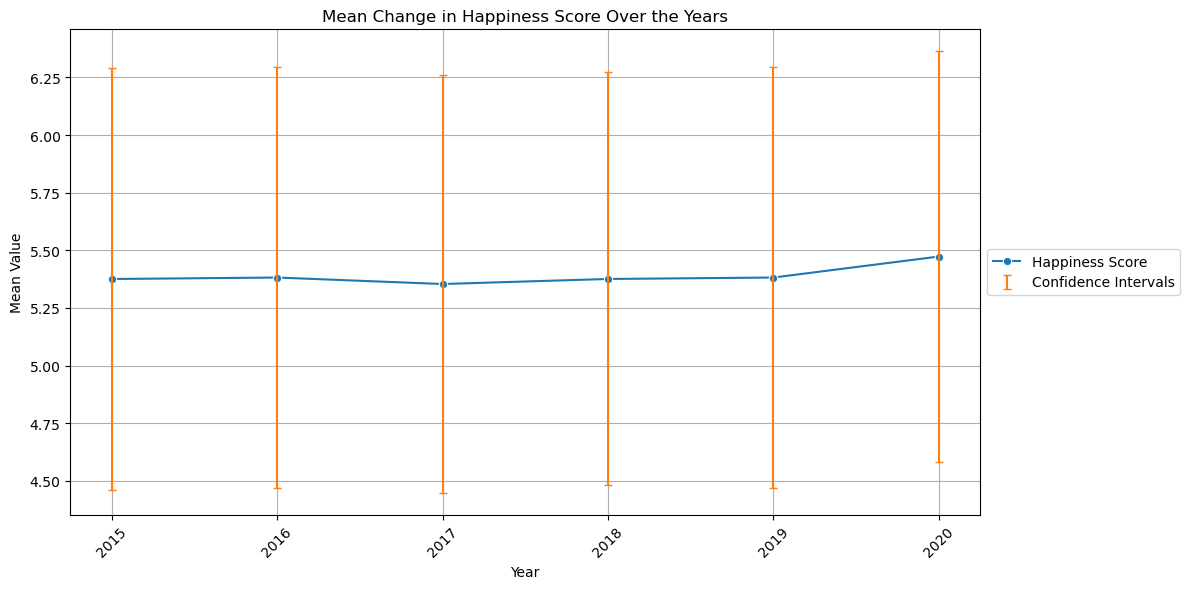

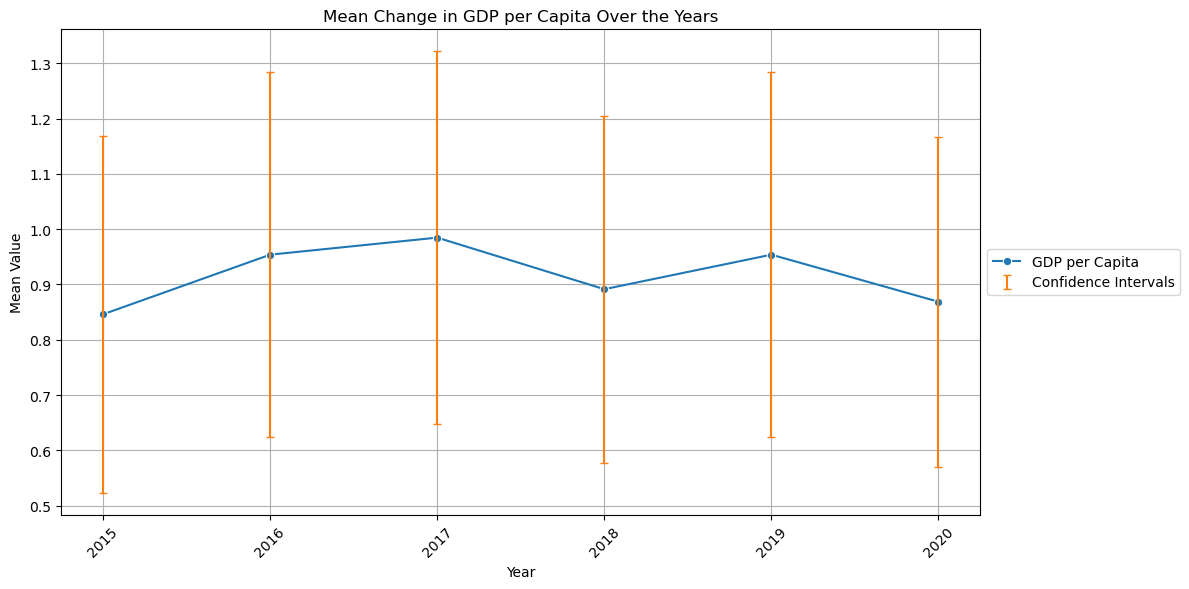

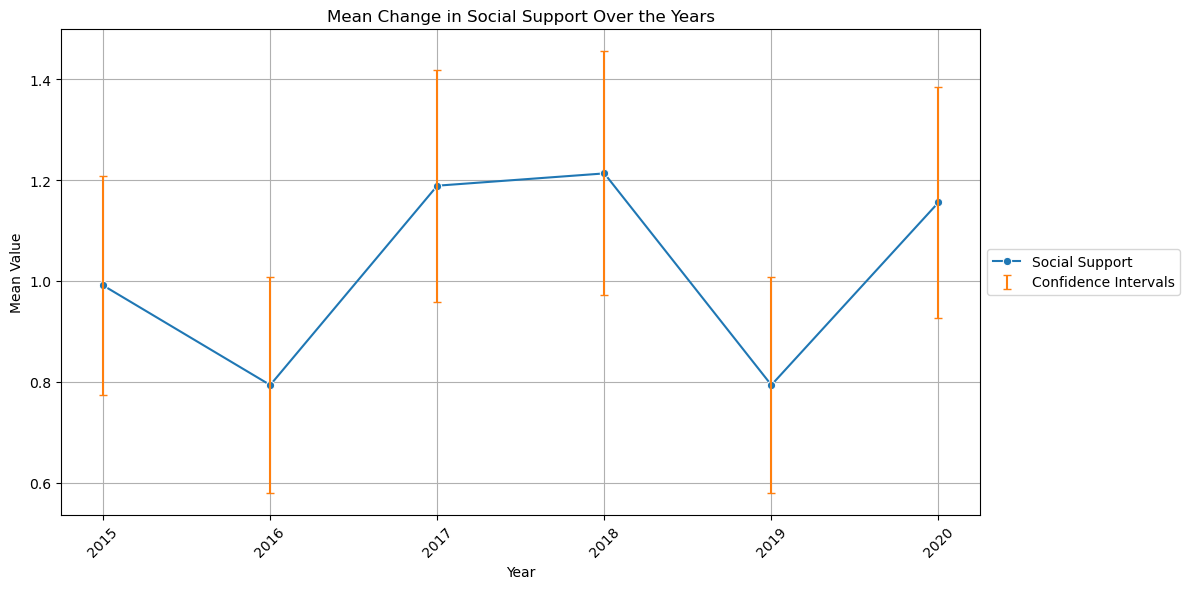

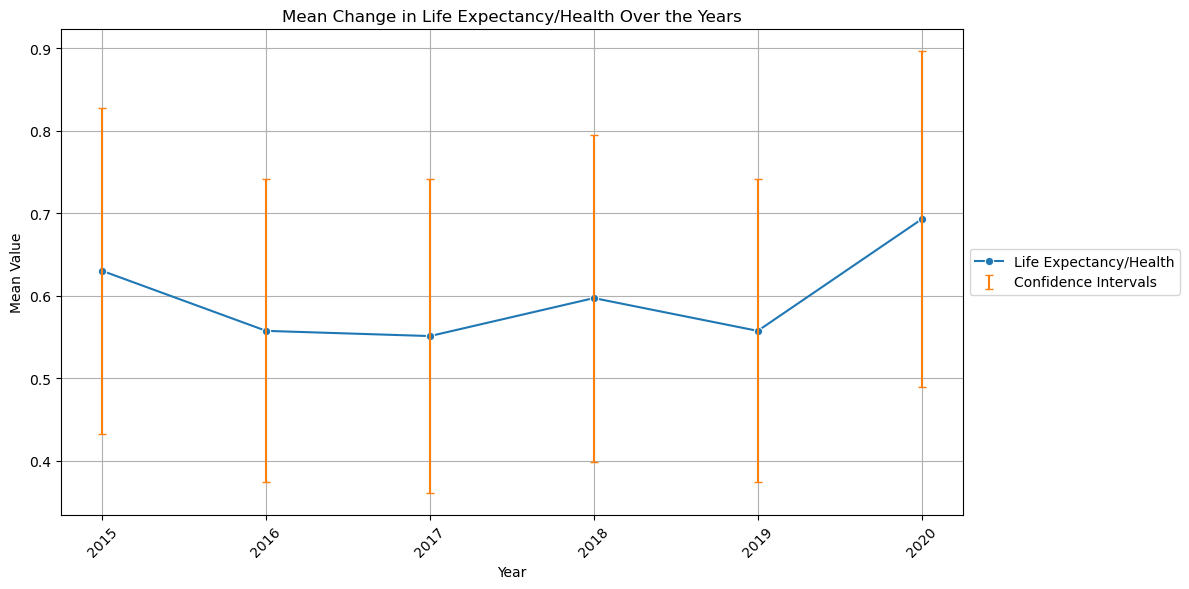

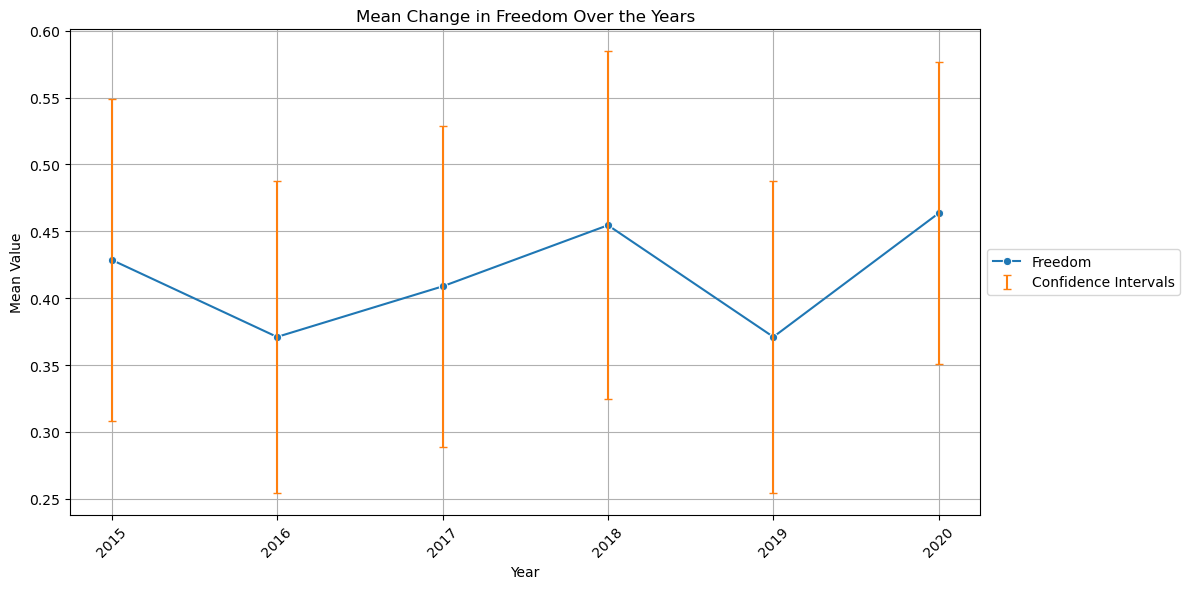

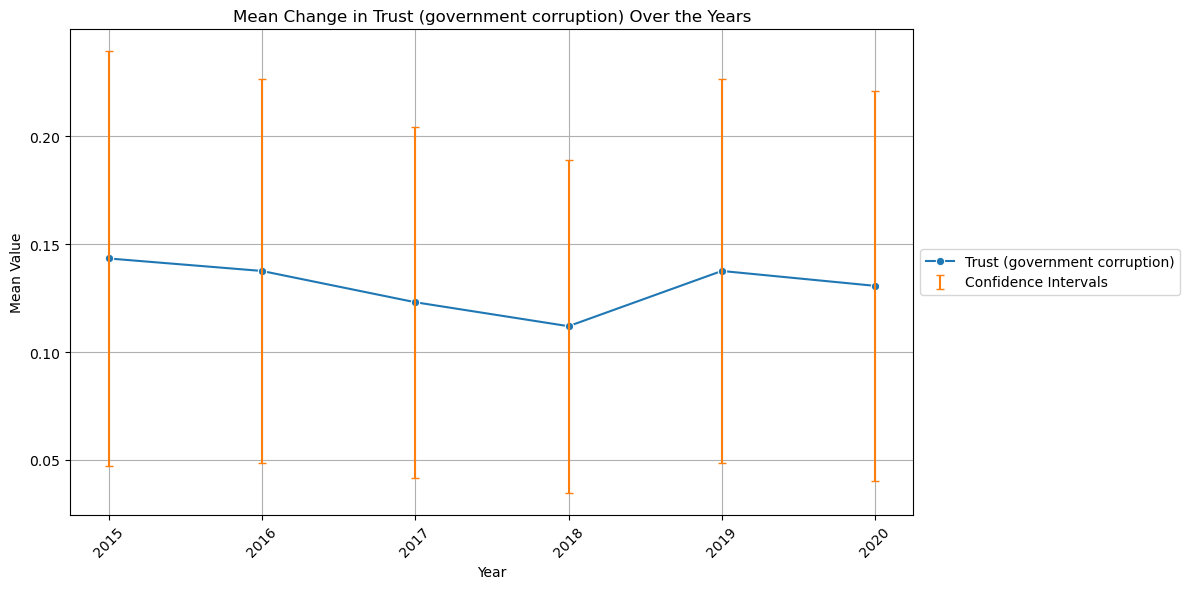

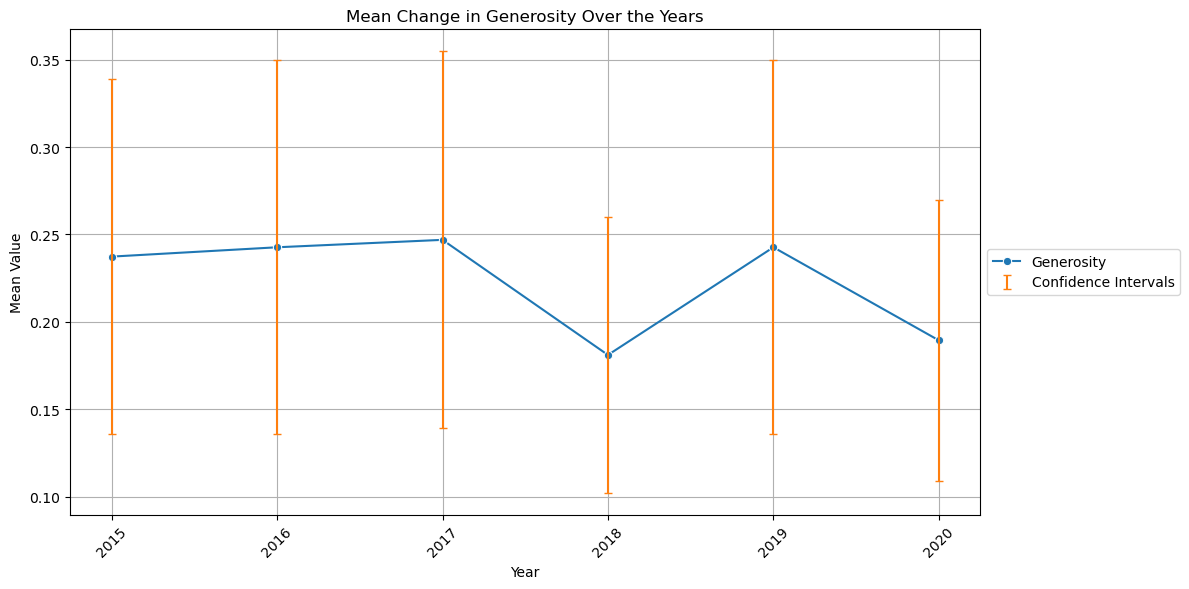

In [36]:
# Looking at the confidence intervals
# Calculate the mean values and standard deviations for each variable over the years
std_data = df.groupby(['Year']).std()

# Reset the index for plotting
std_data = std_data.reset_index()

# Melt the DataFrames for easier plotting
std_data_melted = pd.melt(std_data, id_vars=['Year'], var_name='Variable', value_name='Standard Deviation')

# Create line plots for each variable with confidence intervals on separate graphs
variables = mean_data_melted['Variable'].unique()

for variable in variables:
    plt.figure(figsize=(12, 6))
    variable_data = mean_data_melted[mean_data_melted['Variable'] == variable]
    
    # Calculate confidence intervals for each data point
    confidence_intervals = 1.96 * (std_data_melted[std_data_melted['Variable'] == variable]['Standard Deviation'] / np.sqrt(len(dataframes)))
    
    # Plot the line
    sns.lineplot(data=variable_data, x='Year', y='Mean Value', marker='o', label=variable)
    
    # Plot confidence intervals as error bars
    plt.errorbar(
        x=variable_data['Year'], 
        y=variable_data['Mean Value'], 
        yerr=confidence_intervals,
        linestyle='None',
        capsize=3,
        label='Confidence Intervals'
    )

    plt.xlabel('Year')
    plt.ylabel('Mean Value')
    plt.title(f'Mean Change in {variable} Over the Years')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
     # Define the filename based on the variable name (replace "/" with "_")
    #filename = f'mean_change_{variable.replace("/", "_")}.png'
    
    # Save the figure as a separate image with the correct filename
    #plt.savefig(filename)
    
plt.show()

In [38]:
# Globe maps of happiness score
# 2015 Globe Map
data = dict(type = 'choropleth', 
           locations = data2015['Country'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = data2015['Happiness Score'], 
           text = data2015['Country'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [ ]:
# 2016 Globe Map
data = dict(type = 'choropleth', 
           locations = data2016['Country'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = data2016['Happiness Score'], 
           text = data2016['Country'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [ ]:
# 2017 Globe Map
data = dict(type = 'choropleth', 
           locations = data2017['Country'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = data2017['Happiness Score'], 
           text = data2017['Country'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [ ]:
# 2018 Globe Map
data = dict(type = 'choropleth', 
           locations = data2018['Country'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = data2018['Happiness Score'], 
           text = data2018['Country'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [ ]:
# 2019 Globe Map
data = dict(type = 'choropleth', 
           locations = data2019['Country'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = data2019['Happiness Score'], 
           text = data2019['Country'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [ ]:
# 2020 Globe Map
data = dict(type = 'choropleth', 
           locations = data2019['Country'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = data2019['Happiness Score'], 
           text = data2019['Country'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

# How happiness and different attributes are affected by GDP per Capita?
1. Dataframe showing top 10 and bottom 10 countries based on GDP per Capita
2. Scatter plot with linear regression showing GDP per Capita vs. Happiness/other attributes
3. Box plot visualisations based on GDP per Capita

## Bottom 10 countries

In [42]:
bottom_10_countries_2015 = data2015.sort_values(by='GDP per Capita').head(10)
bottom_10_countries_2015

Country  Happiness Score  GDP per Capita  \
119          Congo (Kinshasa)            4.517         0.00000   
156                   Burundi            2.905         0.01530   
130                    Malawi            4.292         0.01604   
143                     Niger            3.845         0.06940   
115                   Liberia            4.571         0.07120   
147  Central African Republic            3.678         0.07850   
93                 Mozambique            4.971         0.08308   
149                    Guinea            3.656         0.17417   
90          Somaliland region            5.057         0.18847   
121                  Ethiopia            4.512         0.19073   

     Social Support  Life Expectancy/Health  Freedom  \
119         1.00120                 0.09806  0.22605   
156         0.41587                 0.22396  0.11850   
130         0.41134                 0.22562  0.43054   
143         0.77265                 0.29707  0.47692   
115         0.78968                 0.34201  0.28531   
147         0.00000                 0.06699  0.48879   
93          1.02626                 0.09131  0.34037   
149         0.46475                 0.24009  0.37725   
90          0.95152                 0.43873  0.46582   
121         0.60406                 0.44055  0.43450   

     Trust (government corruption)  Generosity  
119                        0.07625     0.24834  
156                        0.10062     0.19727  
130                        0.06977     0.33128  
143                        0.15639     0.19387  
115                        0.06232     0.24362  
147                        0.08289     0.23835  
93                         0.15603     0.22269  
149                        0.12139     0.28657  
90                         0.39928     0.50318  
121                        0.15048     0.24325

In [54]:
bottom_10_countries_2016 = data2016.sort_values(by='GDP per Capita').head(10)
bottom_10_countries_2016

Country  Happiness Score  GDP per Capita  Social Support  \
75             Somalia            5.440         0.00000         0.33613   
124   Congo (Kinshasa)            4.272         0.05661         0.80676   
156            Burundi            2.905         0.06831         0.23442   
131             Malawi            4.156         0.08709         0.14700   
149            Liberia            3.622         0.10706         0.50353   
141              Niger            3.856         0.13270         0.60530   
150             Guinea            3.607         0.22415         0.31090   
96   Somaliland Region            5.057         0.25558         0.75862   
137            Comoros            3.956         0.27509         0.60323   
147         Madagascar            3.695         0.27954         0.46115   

     Life Expectancy/Health  Freedom  Trust (government corruption)  \
75                  0.11466  0.56778                        0.31180   
124                 0.18800  0.15602                        0.06075   
156                 0.15747  0.04320                        0.09419   
131                 0.29364  0.41430                        0.07564   
149                 0.23165  0.25748                        0.04852   
141                 0.26162  0.38041                        0.17176   
150                 0.18829  0.30953                        0.11920   
96                  0.33108  0.39130                        0.36794   
137                 0.29981  0.15412                        0.18437   
147                 0.37109  0.13684                        0.07506   

     Generosity  
75      0.27225  
124     0.25458  
156     0.20290  
131     0.30968  
149     0.24063  
141     0.20970  
150     0.29914  
96      0.51479  
137     0.18270  
147     0.22040

In [46]:
bottom_10_countries_2017 = data2017.sort_values(by='GDP per Capita').head(10)
bottom_10_countries_2017

Country  Happiness Score  GDP per Capita  \
154  Central African Republic            2.693        0.000000   
92                    Somalia            5.151        0.022643   
153                   Burundi            2.905        0.091623   
125          Congo (Kinshasa)            4.280        0.092102   
147                   Liberia            3.533        0.119042   
134                     Niger            4.028        0.161925   
135                    Malawi            3.970        0.233442   
112                Mozambique            4.550        0.234306   
148                    Guinea            3.507        0.244550   
149                      Togo            3.495        0.305445   

     Social Support  Life Expectancy/Health   Freedom  \
154        0.000000                0.018773  0.270842   
92         0.721151                0.113989  0.602127   
153        0.629794                0.151611  0.059901   
125        1.229023                0.191407  0.235961   
147        0.872118                0.229918  0.332881   
134        0.993025                0.268505  0.363659   
135        0.512569                0.315090  0.466915   
112        0.870701                0.106654  0.480791   
148        0.791245                0.194129  0.348588   
149        0.431883                0.247106  0.380426   

     Trust (government corruption)  Generosity  
154                       0.056565    0.280876  
92                        0.282410    0.291631  
153                       0.084148    0.204435  
125                       0.060241    0.246456  
147                       0.038948    0.266550  
134                       0.138573    0.228674  
135                       0.072712    0.287170  
112                       0.179436    0.322228  
148                       0.110938    0.264815  
149                       0.095665    0.196896

In [47]:
bottom_10_countries_2018 = data2018.sort_values(by='GDP per Capita').head(10)
bottom_10_countries_2018

Country  Happiness Score  GDP per Capita  \
97                    Somalia            4.982           0.000   
154  Central African Republic            3.083           0.024   
131          Congo (Kinshasa)            4.245           0.069   
148                   Liberia            3.495           0.076   
155                   Burundi            2.905           0.091   
133                     Niger            4.166           0.131   
146                    Malawi            3.587           0.186   
122                Mozambique            4.417           0.198   
112              Sierra Leone            4.571           0.256   
138                      Togo            3.999           0.259   

     Social Support  Life Expectancy/Health  Freedom  \
97            0.712                   0.115    0.674   
154           0.000                   0.010    0.305   
131           1.136                   0.204    0.312   
148           0.858                   0.267    0.419   
155           0.627                   0.145    0.065   
133           0.867                   0.221    0.390   
146           0.541                   0.306    0.531   
122           0.902                   0.173    0.531   
112           0.813                   0.000    0.355   
138           0.474                   0.253    0.434   

     Trust (government corruption)  Generosity  
97                           0.282       0.238  
154                          0.038       0.218  
131                          0.052       0.197  
148                          0.030       0.206  
155                          0.076       0.149  
133                          0.099       0.175  
146                          0.080       0.210  
122                          0.158       0.206  
112                          0.053       0.238  
138                          0.101       0.158

In [48]:
bottom_10_countries_2019 = data2019.sort_values(by='GDP per Capita').head(10)
bottom_10_countries_2019

Country  Happiness Score  GDP per Capita  Social Support  \
75             Somalia            5.440         0.00000         0.33613   
124   Congo (Kinshasa)            4.272         0.05661         0.80676   
156            Burundi            2.905         0.06831         0.23442   
131             Malawi            4.156         0.08709         0.14700   
149            Liberia            3.622         0.10706         0.50353   
141              Niger            3.856         0.13270         0.60530   
150             Guinea            3.607         0.22415         0.31090   
96   Somaliland Region            5.057         0.25558         0.75862   
137            Comoros            3.956         0.27509         0.60323   
147         Madagascar            3.695         0.27954         0.46115   

     Life Expectancy/Health  Freedom  Trust (government corruption)  \
75                  0.11466  0.56778                        0.31180   
124                 0.18800  0.15602                        0.06075   
156                 0.15747  0.04320                        0.09419   
131                 0.29364  0.41430                        0.07564   
149                 0.23165  0.25748                        0.04852   
141                 0.26162  0.38041                        0.17176   
150                 0.18829  0.30953                        0.11920   
96                  0.33108  0.39130                        0.36794   
137                 0.29981  0.15412                        0.18437   
147                 0.37109  0.13684                        0.07506   

     Generosity  
75      0.27225  
124     0.25458  
156     0.20290  
131     0.30968  
149     0.24063  
141     0.20970  
150     0.29914  
96      0.51479  
137     0.18270  
147     0.22040

In [49]:
bottom_10_countries_2020 = data2020.sort_values(by='GDP per Capita').head(10)
bottom_10_countries_2020

Country  Happiness Score  GDP per Capita  \
139                   Burundi           3.7753        0.000000   
148  Central African Republic           3.4759        0.041072   
130          Congo (Kinshasa)           4.3110        0.062487   
102                     Niger           4.9096        0.108330   
123                   Liberia           4.5579        0.174103   
144                    Malawi           3.5380        0.176535   
119                Mozambique           4.6236        0.178741   
138              Sierra Leone           3.9264        0.240560   
136                Madagascar           4.1656        0.244553   
112                    Gambia           4.7506        0.256991   

     Social Support  Life Expectancy/Health   Freedom  \
139        0.403575                0.295213  0.275399   
148        0.000000                0.000000  0.292814   
130        0.833055                0.277212  0.364623   
102        0.703800                0.298816  0.435312   
123        0.920734                0.392284  0.405943   
144        0.530368                0.446163  0.487390   
119        0.955203                0.324224  0.560775   
138        0.747985                0.203954  0.382028   
136        0.823694                0.500617  0.192968   
112        0.882679                0.353248  0.403420   

     Trust (government corruption)  Generosity  
139                       0.212187    0.187402  
148                       0.028265    0.253513  
130                       0.081467    0.254325  
102                       0.137555    0.208177  
123                       0.051140    0.226968  
144                       0.131634    0.213185  
119                       0.163064    0.220422  
138                       0.047941    0.257647  
136                       0.076249    0.191190  
112                       0.158094    0.425990

## Top 10 countries

In [55]:
top_10_countries_2015 = data2015.sort_values(by='GDP per Capita', ascending=False).head(10)
top_10_countries_2015

Country  Happiness Score  GDP per Capita  Social Support  \
27                 Qatar            6.611         1.69042         1.07860   
16            Luxembourg            6.946         1.56391         1.21963   
38                Kuwait            6.295         1.55422         1.16594   
23             Singapore            6.798         1.52186         1.02000   
3                 Norway            7.522         1.45900         1.33095   
19  United Arab Emirates            6.901         1.42727         1.12575   
0            Switzerland            7.587         1.39651         1.34951   
34          Saudi Arabia            6.411         1.39541         1.08393   
14         United States            7.119         1.39451         1.24711   
71             Hong Kong            5.474         1.38604         1.05818   

    Life Expectancy/Health  Freedom  Trust (government corruption)  Generosity  
27                 0.79733  0.64040                        0.52208     0.32573  
16                 0.91894  0.61583                        0.37798     0.28034  
38                 0.72492  0.55499                        0.25609     0.16228  
23                 1.02525  0.54252                        0.49210     0.31105  
3                  0.88521  0.66973                        0.36503     0.34699  
19                 0.80925  0.64157                        0.38583     0.26428  
0                  0.94143  0.66557                        0.41978     0.29678  
34                 0.72025  0.31048                        0.32524     0.13706  
14                 0.86179  0.54604                        0.15890     0.40105  
71                 1.01328  0.59608                        0.37124     0.39478

In [56]:
top_10_countries_2016 = data2016.sort_values(by='GDP per Capita', ascending=False).head(10)

In [57]:
top_10_countries_2017 = data2017.sort_values(by='GDP per Capita', ascending=False).head(10)

In [58]:
top_10_countries_2018 = data2018.sort_values(by='GDP per Capita', ascending=False).head(10)

In [59]:
top_10_countries_2019 = data2019.sort_values(by='GDP per Capita', ascending=False).head(10)

In [60]:
top_10_countries_2020 = data2020.sort_values(by='GDP per Capita', ascending=False).head(10)

## Summary statistics 

In [63]:
top_10_summary_2015 = top_10_countries_2015['GDP per Capita'].describe()
top_10_summary_2015

count    10.000000
mean      1.597096
std       0.103940
min       1.489530
25%       1.514857
50%       1.575480
75%       1.638448
max       1.824270
Name: GDP per Capita, dtype: float64

In [ ]:
top_10_summary_2016 = top_10_countries_2016['GDP per Capita'].describe()
top_10_summary_2016

In [ ]:
top_10_summary_2017 = top_10_countries_2017['GDP per Capita'].describe()
top_10_summary_2017

In [ ]:
top_10_summary_2018 = top_10_countries_2018['GDP per Capita'].describe()
top_10_summary_2018

In [ ]:
top_10_summary_2019 = top_10_countries_2019['GDP per Capita'].describe()
top_10_summary_2019

In [ ]:
top_10_summary_2020 = top_10_countries_2020['GDP per Capita'].describe()
top_10_summary_2020

## Scatter plots: GDP vs [Social Support, Healthy life Exp, Freedom to make life choices, Generosity, Corruption ] 

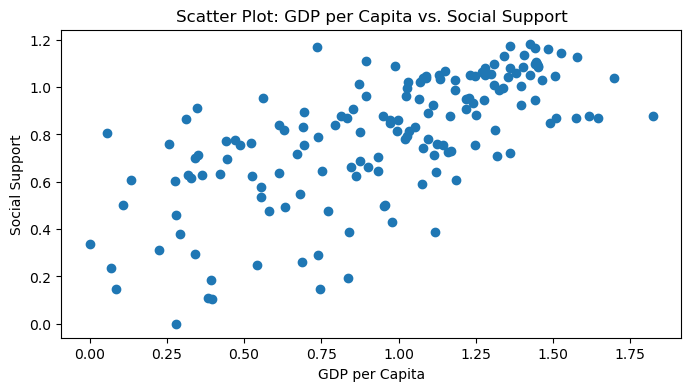

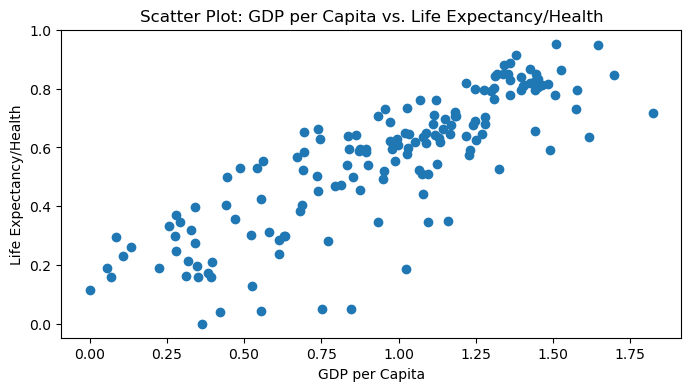

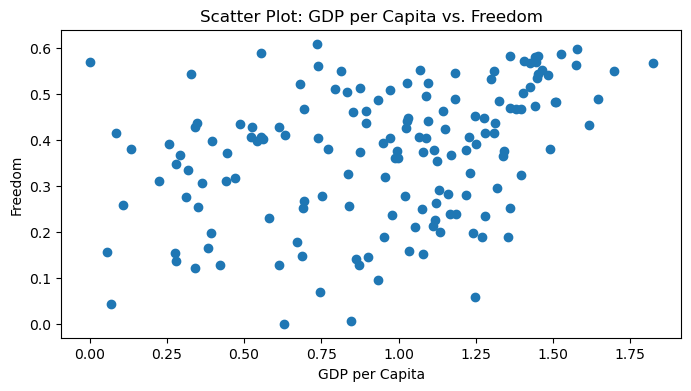

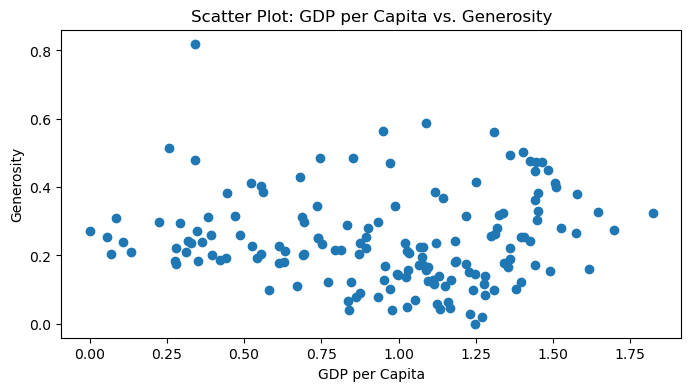

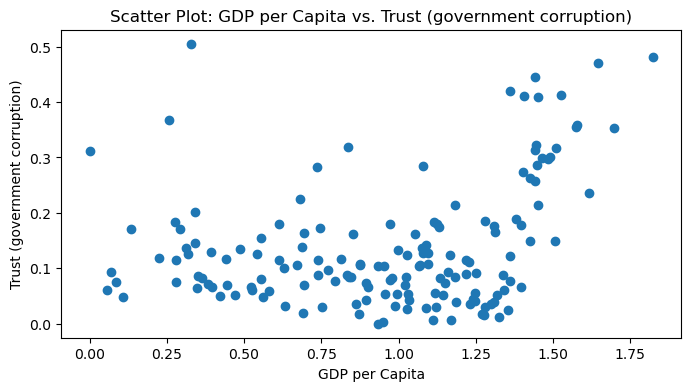

In [70]:
# Scatter plots as an example
variables = ['Social Support', 'Life Expectancy/Health', 'Freedom', 'Generosity', 'Trust (government corruption)']

for variable in variables:
    plt.figure(figsize=(8, 4))
    plt.scatter(data2019['GDP per Capita'], data2019[variable])
    plt.xlabel('GDP per Capita')
    plt.ylabel(variable)
    plt.title(f'Scatter Plot: GDP per Capita vs. {variable}')
    plt.show()

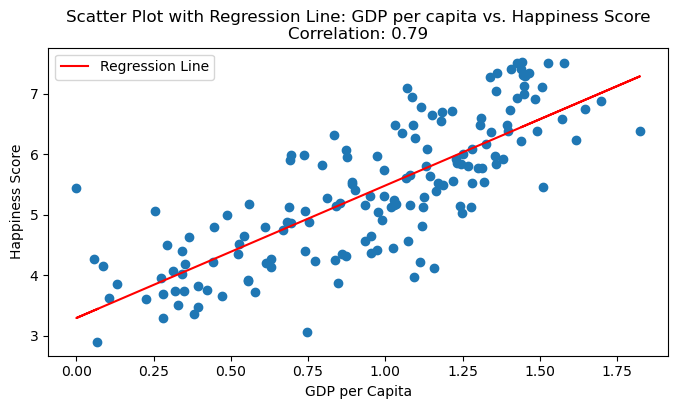

In [73]:
slope, intercept, r_value, p_value, std_err = linregress(data2019['GDP per Capita'], data2019['Happiness Score'])
regression_line = slope * data2019['GDP per Capita'] + intercept

plt.figure(figsize=(8, 4))
plt.scatter(data2019['GDP per Capita'], data2019['Happiness Score'])
plt.plot(data2019['GDP per Capita'], regression_line, color='red', label='Regression Line')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.title(f'Scatter Plot with Regression Line: GDP per capita vs. Happiness Score\nCorrelation: {r_value:.2f}')
plt.legend()
plt.show()

## Box Plot: Happiness Score vs. GDP per Capita Range

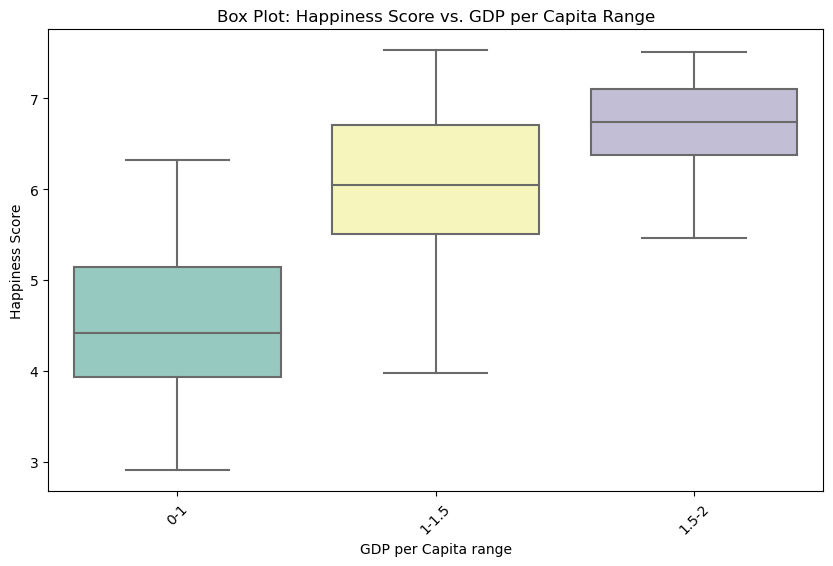

In [77]:
# Create bins for GDP per capita ranges
bins = [0, 1, 1.5, 2]
labels = ['0-1', '1-1.5', '1.5-2']

# Create a new column for GDP per capita ranges
data2019['GDP per Capita range'] = pd.cut(data2019['GDP per Capita'], bins=bins, labels=labels)

# Box plot of Happiness Score for GDP per capita ranges
plt.figure(figsize=(10, 6))
sns.boxplot(x='GDP per Capita range', y='Happiness Score', data=data2019, palette='Set3')
plt.xlabel('GDP per Capita range')
plt.ylabel('Happiness Score')
plt.title('Box Plot: Happiness Score vs. GDP per Capita Range')
plt.xticks(rotation=45)
plt.show()

# Remove the added column for GDP per capita ranges
data2019.drop(columns=['GDP per Capita range'], inplace=True)

# How happiness and different attributes are affected by Social and Cultural Factors?
1. Scatter plot
2. Corellation heatmap
3. Histograms 

## Correlation Coefficient Map for 2019

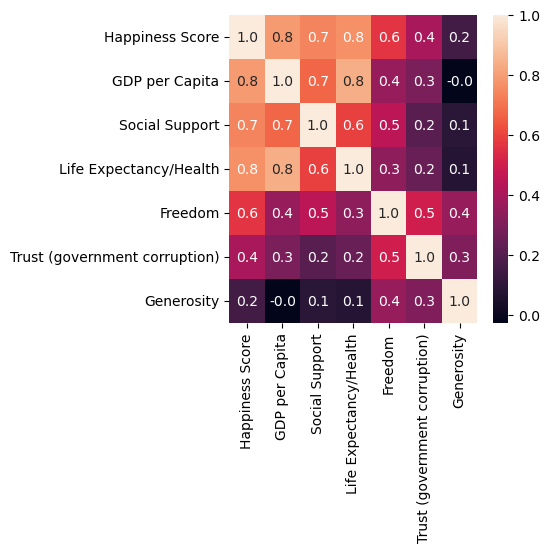

In [78]:
# Corellation heatmap for 2019
data2019.corr()
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(data2019.corr(), annot=True,fmt='.1f',ax=ax) 

# Dismiss an information column
plt.show() 

## Scatter plots for 2019

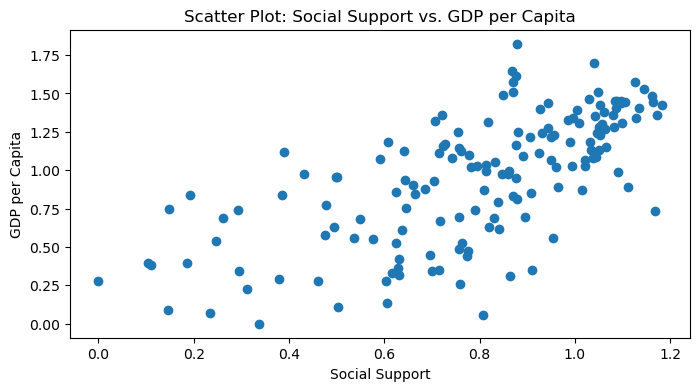

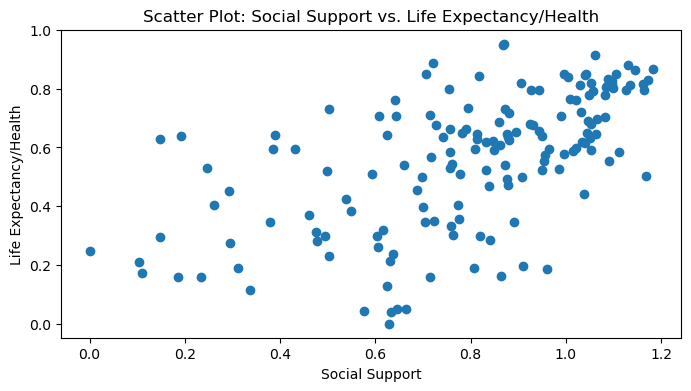

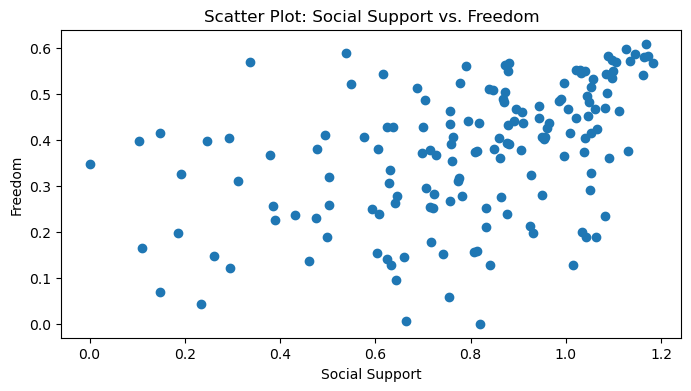

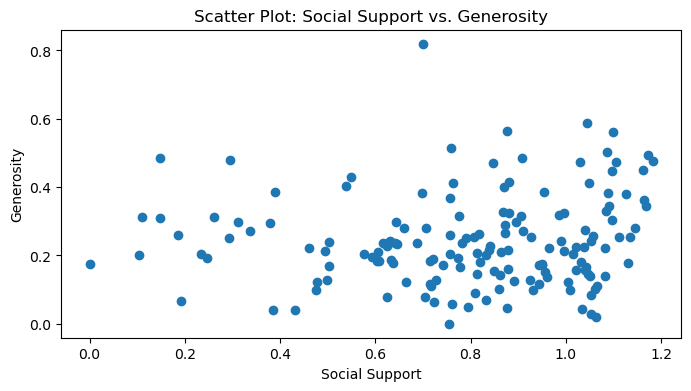

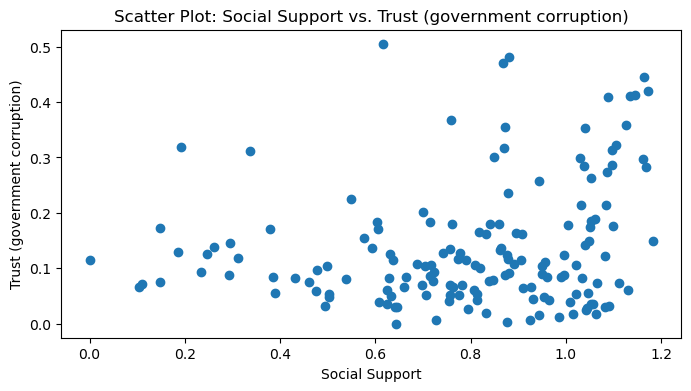

In [76]:
# Scatter plots for 2019
variables = ['GDP per Capita', 'Life Expectancy/Health', 'Freedom', 'Generosity', 'Trust (government corruption)']

for variable in variables:
    plt.figure(figsize=(8, 4))
    plt.scatter(data2019['Social Support'], data2019[variable])
    plt.xlabel('Social Support')
    plt.ylabel(variable)
    plt.title(f'Scatter Plot: Social Support vs. {variable}')
    plt.show()

## Histograms for 2019

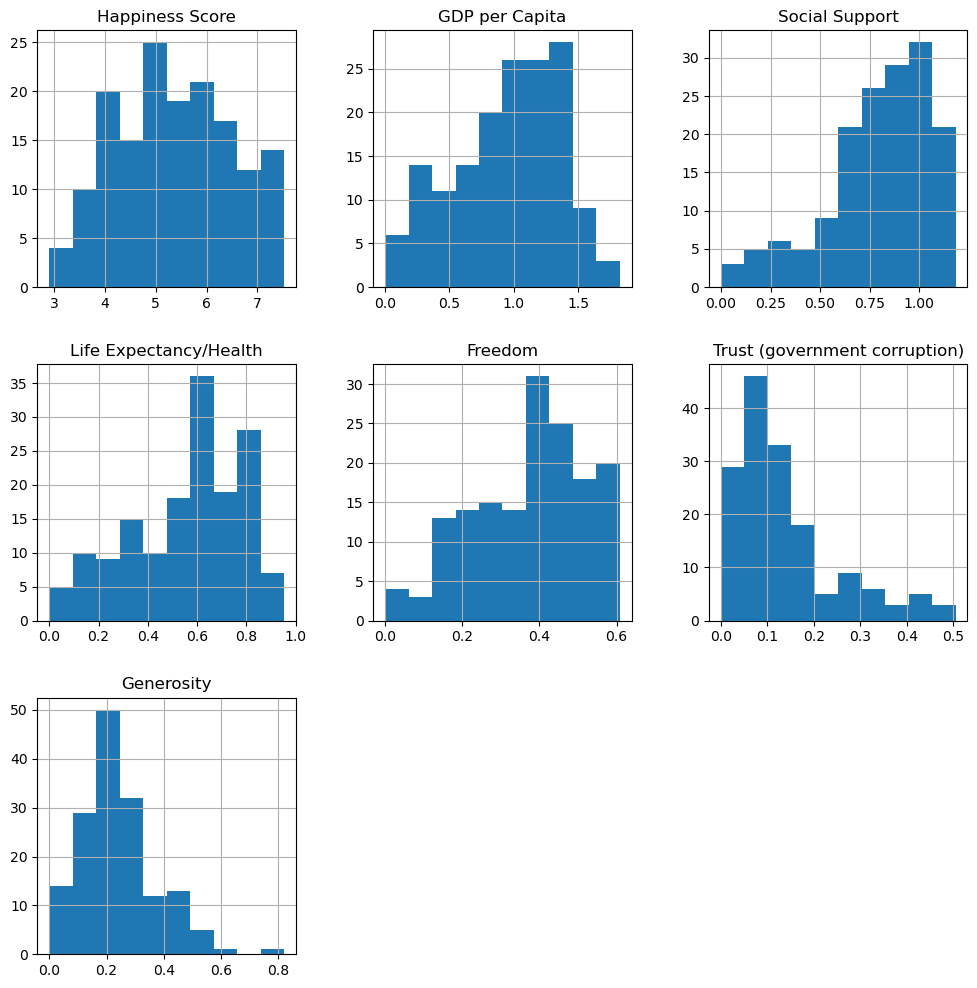

In [79]:
# distribution of all numeric data
plt.rcParams['figure.figsize'] = (12, 12)
data2019.hist();